# 📓 Notebook - Teori & Praktik Bab 14: Deep Computer Vision dengan CNN

Convolutional Neural Networks (CNN) muncul dari kajian terhadap korteks visual otak. CNN telah merevolusi pencarian gambar, mobil otonom, dan klasifikasi video. Berbeda dengan *Dense Layer* biasa di mana setiap neuron terhubung ke semua input, neuron dalam CNN hanya terhubung ke sebagian kecil area visual (*local receptive field*).

Topik pembahasan meliputi:
1.  **Operasi Konvolusi**: Filter, Kernel, Padding, dan Stride.
2.  **Pooling Layers**: Mengurangi dimensi dan beban komputasi.
3.  **Arsitektur CNN Dasar**: Membangun model klasifikasi gambar.
4.  **Data Augmentation**: Mencegah overfitting dengan memvariasikan data latih.
5.  **Transfer Learning**: Menggunakan model *state-of-the-art* (ResNet/Xception) untuk tugas baru.

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


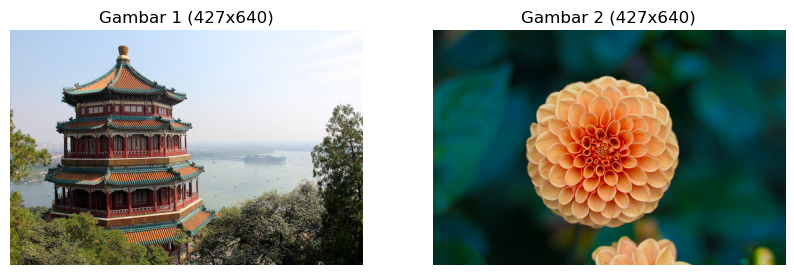

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

tf.random.set_seed(42)
np.random.seed(42)

images = load_sample_images().images
images = np.array(images, dtype=np.float32) / 255.0
batch_size, height, width, channels = images.shape

plt.figure(figsize=(10, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(f"Gambar {i+1} ({height}x{width})")
plt.show()

## 1. Operasi Konvolusi (Filters & Feature Maps)

### Teori
Lapisan konvolusi adalah komponen terpenting dari CNN. Neuron pada lapisan ini tidak terhubung ke setiap piksel gambar input, tetapi hanya ke bidang persegi kecil (misal 3x3 piksel).

Konsep kunci:
* **Filter (Kernel):** Matriks bobot kecil yang "digeser" ke seluruh gambar untuk mendeteksi pola spesifik (seperti garis vertikal atau horizontal).
* **Feature Map:** Output dari operasi konvolusi yang menunjukkan di mana pola tersebut ditemukan.
* **Stride:** Jarak langkah pergeseran filter. Stride lebih besar mengurangi dimensi output.
* **Padding:** Penambahan piksel nol di pinggir gambar.
    * `"VALID"`: Tanpa padding (output mengecil).
    * `"SAME"`: Dengan padding (output berukuran sama dengan input jika stride=1).

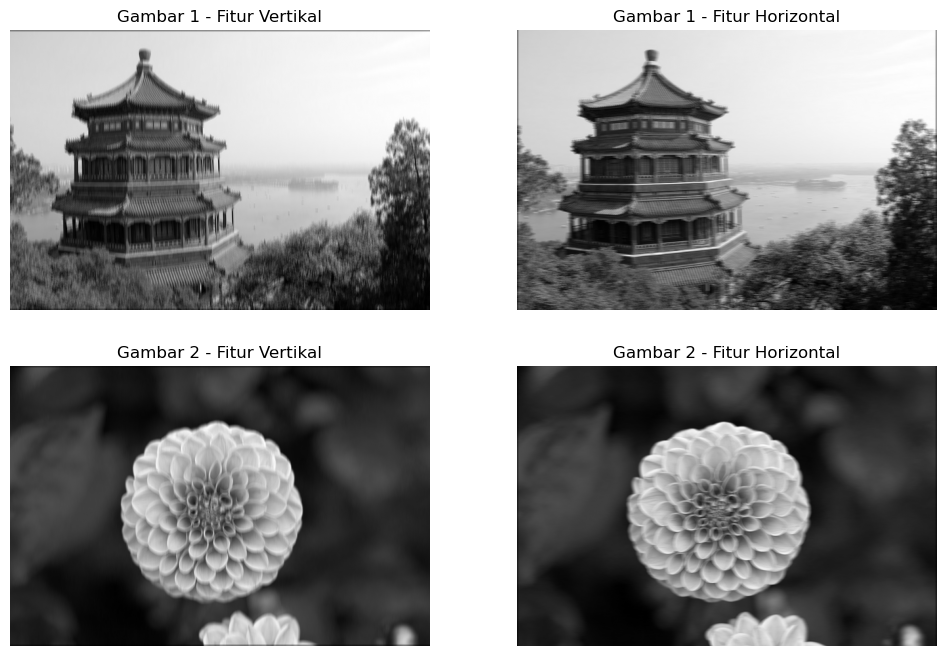

In [ ]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  
filters[3, :, :, 1] = 1  

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(12, 8))
for i in range(2):
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(outputs[i, :, :, 0], cmap="gray")
    plt.axis("off")
    plt.title(f"Gambar {i+1} - Fitur Vertikal")
    
    plt.subplot(2, 2, i * 2 + 2)
    plt.imshow(outputs[i, :, :, 1], cmap="gray")
    plt.axis("off")
    plt.title(f"Gambar {i+1} - Fitur Horizontal")
plt.show()

## 2. Pooling Layers

### Teori
Tujuan Pooling Layer adalah untuk menyusutkan (*subsample*) gambar input guna mengurangi beban komputasi, penggunaan memori, dan jumlah parameter, serta membuat model lebih tahan terhadap pergeseran posisi kecil (*invariance*).

* **Max Pooling:** Mengambil nilai maksimum di setiap jendela (window). Paling sering digunakan karena mempertahankan fitur paling menonjol.
* **Average Pooling:** Mengambil nilai rata-rata. Sekarang jarang digunakan kecuali di lapisan terakhir beberapa arsitektur.

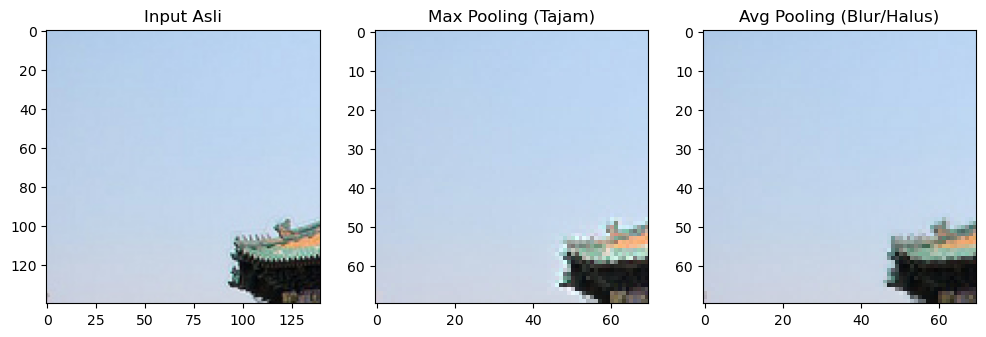

In [ ]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
avg_pool = keras.layers.AvgPool2D(pool_size=2)

cropped_images = images[:, 0:140, 0:140]
output_max = max_pool(cropped_images)
output_avg = avg_pool(cropped_images)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(cropped_images[0])
axes[0].set_title("Input Asli")
axes[1].imshow(output_max[0])
axes[1].set_title("Max Pooling (Tajam)")
axes[2].imshow(output_avg[0])
axes[2].set_title("Avg Pooling (Blur/Halus)")
plt.show()

## 3. Arsitektur CNN Dasar

### Teori
Arsitektur CNN tipikal terdiri dari tumpukan lapisan: **[Conv2D $\rightarrow$ Activation $\rightarrow$ Pooling]**, diulang beberapa kali, diakhiri dengan lapisan **Dense** (Fully Connected) untuk prediksi output.

Semakin dalam jaringan (semakin ke arah output), ukuran gambar mengecil, tetapi jumlah filter (kedalaman channel) biasanya bertambah. Ini memungkinkan model mendeteksi fitur sederhana (garis) di awal, dan fitur kompleks (wajah/objek) di akhir.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),

    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,406,218 (5.36 MB)

 Trainable params: 1,406,218 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Data Augmentation

### Teori
Deep CNN sangat rentan terhadap *overfitting* jika data latih sedikit. **Data Augmentation** menghasilkan variasi data latih secara sintetis dengan memutar, menggeser, membalik, atau memperbesar gambar asli secara acak.

Di Keras, augmentasi dapat dimasukkan langsung sebagai lapisan di dalam model.

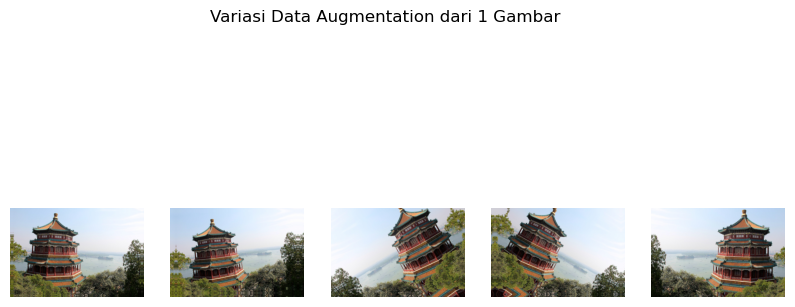

In [ ]:
data_augmentation = keras.models.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

plt.figure(figsize=(10, 5))
first_image = images[0]

for i in range(5):
    plt.subplot(1, 5, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0])
    plt.axis("off")
    
plt.suptitle("Variasi Data Augmentation dari 1 Gambar")
plt.show()

## 5. Transfer Learning (Menggunakan Pretrained Models)

### Teori
Untuk tugas klasifikasi gambar yang kompleks, jarang sekali model dilatih dari nol (*scratch*). Pendekatan standar adalah menggunakan model yang sudah dilatih pada dataset raksasa (ImageNet) seperti ResNet50, Xception, atau MobileNet.

Bagian "kepala" (Dense layers) model asli dibuang (`include_top=False`) dan diganti dengan GlobalAveragePooling serta Dense layer baru yang sesuai dengan jumlah kelas tugas kita.

In [ ]:
base_model = keras.applications.ResNet50V2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

model_transfer = keras.Model(inputs, outputs)
model_transfer.summary()



94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

### Kesimpulan Bab 14

CNN adalah fondasi visi komputer modern. 
* Gunakan **Conv2D** untuk ekstraksi fitur.
* Gunakan **Pooling** untuk reduksi dimensi.
* Gunakan **Data Augmentation** untuk dataset kecil.
* Gunakan **Transfer Learning** untuk hasil terbaik dengan data dan waktu terbatas.